# Ford GoBike System Data
## by Maggie Kiraga

## Preliminary Wrangling

> The following notebook explores a dataset containing a rental data history of more than half-million customers from the United States.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
trip_data = pd.read_csv('2017-fordgobike-tripdata.csv')

In [25]:
# basic dataframe info
print(trip_data.shape)
print(trip_data.dtypes)
trip_data.head()

(519700, 13)
duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                    int64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                      int64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [28]:
trip_data.start_station_name.value_counts()

San Francisco Ferry Building (Harry Bridges Plaza)           15187
The Embarcadero at Sansome St                                13664
San Francisco Caltrain (Townsend St at 4th St)               12546
San Francisco Caltrain Station 2  (Townsend St at 4th St)    12055
Market St at 10th St                                         11960
                                                             ...  
Pierce Ave at Market St                                         11
Harmon St at Adeline St                                          6
Empire St at 1st St                                              5
Jackson St at 11th St                                            2
Ellsworth St at Russell St                                       1
Name: start_station_name, Length: 272, dtype: int64

In [14]:
# changing start and end time data types
trip_data['start_time'] = pd.to_datetime(arg=trip_data.start_time)
trip_data['end_time'] = pd.to_datetime(arg=trip_data.end_time)

In [13]:
# descriptive statistics for numeric variables
trip_data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


### What is the structure of your dataset?

> This dataset consists of 519,700 bike trips, spread over a period of approximately six months. The dataframe is made of 13 variables, where most of them are numeric in nature. 

### What is/are the main feature(s) of interest in your dataset?

> My main goal of this project will be figuring out factors, which are associated with higher rental frequency as well as main bike trip characteristics like: trip duration or distance between rental points.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To investigate the above, I will mainly focus on the variables associated with time, location and distance. One of the variables that will be definitely incorporated into my visualizations will be the duration variable. To better assess the goal of this project, I will need to perform some transformations on the other variables. For example, I will calculate the distance between rental places, based on the latitude and longitude variables, or I will add an extra variable: 'week_day' into the dataframe, based on the start and end time (as I assume that there might be higher rental frequency during weekends). 

## Univariate Exploration

> I will start by looking at the first variable from the dataframe: duration.

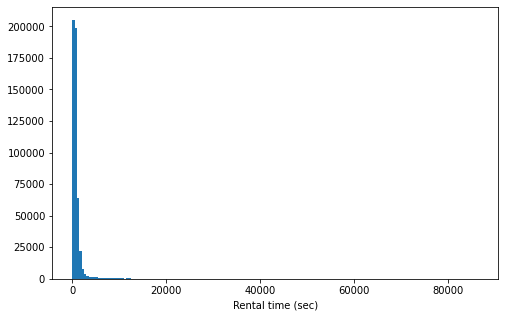

In [30]:
binsize = 500
bins = np.arange(0, trip_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xlabel('Rental time (sec)')
plt.show()

We can see that the distribution is highly skewed. As we can see in the above descriptive statistics section the 75 percentile and the maximum value of the duration variable are highly different, namely 15 minutes and about 24 hours respectively. Those rare but extremely high duration values cause a deformed representation of the general pattern in the data. I will zoom-in the above figure a bit, to get a better look. 

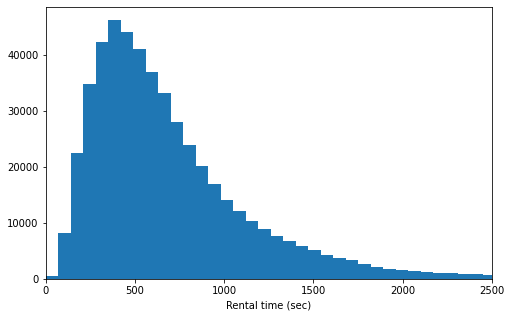

In [40]:
binsize = 70
bins = np.arange(0, trip_data['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xlabel('Rental time (sec)')
plt.xlim((0,2500))
plt.show()

When zooming-in, we can clearly see that bikes are most commonly rented for about 300-500 seconds, with a steep decrease in the duration time above 700 seconds, resulting in a pretty long-tailed distribution for periods of longer rental duration. 

In [41]:
np.log10(trip_data['duration_sec'].describe())

count    5.715753
mean     3.041001
std      3.537082
min      1.785330
25%      2.582063
50%      2.775246
75%      2.972203
max      4.936358
Name: duration_sec, dtype: float64

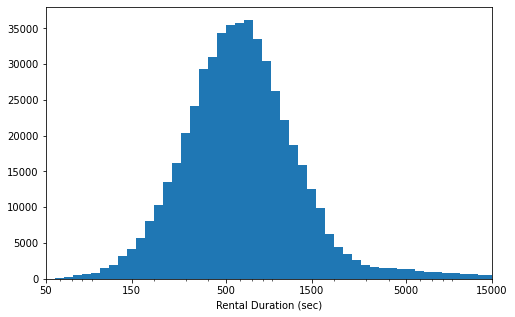

In [54]:
# there's a long tail on the one side of distribution, so I will fit the data with the log scale 

log_binsize = 0.05
bins = 10 ** np.arange(1.7, np.log10(trip_data['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50,150,500, 1500, 5000, 15000, 40000], [50,150,500, 1500, 5000, 15000,40000] )
plt.xlabel('Rental Duration (sec)')
plt.xlim((50,15000))
plt.show()

When transformed into a logarithmic scale, the duration variable follows an almost perfect normal distribution curve. It's still pretty skewed to the right side, with most of the rental duration falling into the 150-1500 sec interval.

Now, I will explore further the next variable of interest: distance between rental places. Firt, I will need to do some data transformation. 

In [7]:
# here I will create a for loop that will calculate distance (in km) between two points
from math import cos, asin, sqrt, pi

def distance(lat1, lon1, lat2, lon2):
    p = pi/180
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p) * cos(lat2*p) * (1-cos((lon2-lon1)*p))/2
    return 12742 * asin(sqrt(a)) 

In [55]:
# here I'm calling the above function and adding a new distance variable into the dataframe, based on latitude 
# and longitude
dist_v = np.vectorize(distance)
trip_data["distance"] = dist_v(
    trip_data.start_station_longitude,
    trip_data.start_station_latitude,
    trip_data.end_station_longitude,
    trip_data.end_station_latitude
)

In [56]:
trip_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,distance
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,1.155357
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,3.070483
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,0.000000
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,0.569998
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,0.795410


In [57]:
trip_data.distance.describe()

count    519700.000000
mean          1.371373
std           0.947040
min           0.000000
25%           0.755997
50%           1.149175
75%           1.773393
max          64.751982
Name: distance, dtype: float64

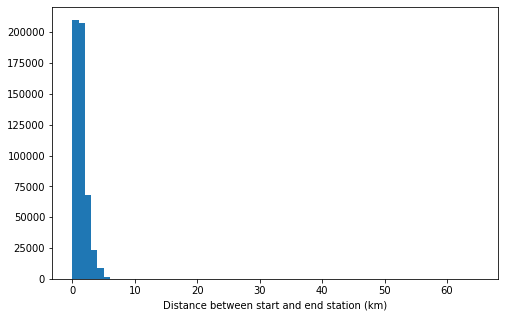

In [70]:
binsize = 1
bins = np.arange(0, trip_data['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'distance', bins = bins)
plt.xlabel('Distance between start and end station (km)')
plt.show()

Similarly to the above example, the distribution for this variable seems to be highly skewed to the right, which deforms the figure pretty badly. Let's zoom-in quite a bit to get a closer look at the values. 

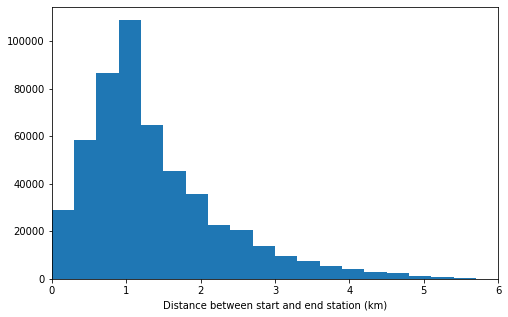

In [69]:
binsize = 0.3
bins = np.arange(0, trip_data['distance'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = trip_data, x = 'distance', bins = bins)
plt.xlabel('Distance between start and end station (km)')
plt.xlim((0,6))
plt.show()

Here we can clearly see that it's a unimodal variable, with the peak values about 1 km, and long right-sided tail, where the distance of 5km and above are highly rare and its frequency almost invisible on the graph. 

Last important variables that left to explore are start and end rental locations. Here I will only plot the data for ten most popular rental places, as plotting a figure for each of the rental stations from the dataframe would lack clarity and make the interpretation of the results extremely difficult. 

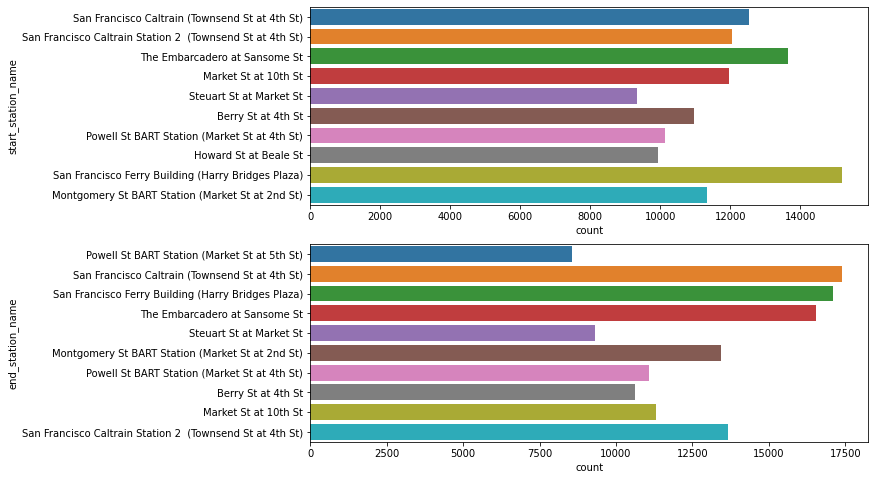

In [108]:
plt.figure(figsize = [10, 8])

plt.subplot(2, 1, 1)
#bin_edges = np.arange(2, 12+1.1, 1) # note `+1.1`, see below
start_stations = trip_data['start_station_name'].value_counts()
top_start_stations = start_stations.index[:10]
trip_data_sub = trip_data.loc[trip_data['start_station_name'].isin(top_start_stations)]
sb.countplot(data=trip_data_sub, y='start_station_name')

plt.subplot(2, 1, 2)
end_stations = trip_data['end_station_name'].value_counts()
top_end_stations = end_stations.index[:10]
trip_data_sub = trip_data.loc[trip_data['end_station_name'].isin(top_end_stations)]
sb.countplot(data=trip_data_sub, y='end_station_name')
plt.show()

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!